
# Trabajo práctico integrador
# Análisis de datos 

## Authors:
- Karen Raczkowski
- Juan Ignacio Ribet
- FS


### 1. Introducción y motivación Les proponemos para este trabajo final realizar el análisis completo para un set de datos, para ello les vamos a proponer varios de estos y la idea es que ustedes elijan uno. Para dar un poco de noción sobre a qué corresponden estos datos, también vamos a presentar a que tipo de problema/etapa del análisis de datos corresponden

In [85]:
# Importamos librerías 
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

# Partición de train-test set
from sklearn.model_selection import train_test_split

# Pipelines
from sklearn.pipeline import Pipeline

# Crear datasets
from sklearn.datasets import make_regression

# Esquemas de entrenamiento
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold


# LEGO Database

- Preguntas interesantes para considerar aquí:
    - ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
    - ¿Existe alguna asociación entre los colores y las temáticas?
    - ¿Podría predecir a que temática pertenece un set basado en el contenido de este? (recomendado)
    - A través de los años, ¿Cuál o cuáles son los sets que tienen las piezas más raras?

![Data set Schema](https://rebrickable.com/static/img/diagrams/downloads_schema_v3.png)

In [86]:
url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'
url_sets ='https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'

In [3]:
themes = pd.read_csv(url_themes, delimiter=',') #(3.9 KB)
colors = pd.read_csv(url_colors, delimiter=',') #(2.5 KB)
part_categories = pd.read_csv(url_part_categories, delimiter=',') #(725 bytes)
parts = pd.read_csv(url_parts, delimiter=',') #(839.0 KB)
part_relationships = pd.read_csv(url_part_relationships, delimiter=',') #(149.0 KB)
elements = pd.read_csv(url_elements, delimiter=',') #(586.8 KB)
sets = pd.read_csv(url_sets, delimiter=',') #(379.9 KB)
minifigs = pd.read_csv(url_minifigs, delimiter=',') #(223.2 KB)
inventories = pd.read_csv(url_inventories, delimiter=',') #(194.1 KB)
inventory_parts = pd.read_csv(url_inventory_parts, delimiter=',') #(9.9 MB)
inventory_sets = pd.read_csv(url_inventory_sets, delimiter=',') #(14.1 KB)
inventory_minifigs = pd.read_csv(url_inventory_minifigs, delimiter=',') #(76.2 KB)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1002)>

In [87]:
# Correr esto si arriba da SSLCertVerificationError

import urllib.request
import gzip
import ssl

# Create an SSL context with certificate verification disabled
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

# Specify the URLs of the datasets
url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'
url_sets = 'https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'

try:
    # Read the compressed CSV data with SSL context
    themes_data = urllib.request.urlopen(url_themes, context=ssl_context)
    colors_data = urllib.request.urlopen(url_colors, context=ssl_context)
    part_categories_data = urllib.request.urlopen(url_part_categories, context=ssl_context)
    parts_data = urllib.request.urlopen(url_parts, context=ssl_context)
    part_relationships_data = urllib.request.urlopen(url_part_relationships, context=ssl_context)
    elements_data = urllib.request.urlopen(url_elements, context=ssl_context)
    sets_data = urllib.request.urlopen(url_sets, context=ssl_context)
    minifigs_data = urllib.request.urlopen(url_minifigs, context=ssl_context)
    inventories_data = urllib.request.urlopen(url_inventories, context=ssl_context)
    inventory_parts_data = urllib.request.urlopen(url_inventory_parts, context=ssl_context)
    inventory_sets_data = urllib.request.urlopen(url_inventory_sets, context=ssl_context)
    inventory_minifigs_data = urllib.request.urlopen(url_inventory_minifigs, context=ssl_context)

    # Decompress the data and read into DataFrames
    themes = pd.read_csv(gzip.GzipFile(fileobj=themes_data), delimiter=',')
    colors = pd.read_csv(gzip.GzipFile(fileobj=colors_data), delimiter=',')
    part_categories = pd.read_csv(gzip.GzipFile(fileobj=part_categories_data), delimiter=',')
    parts = pd.read_csv(gzip.GzipFile(fileobj=parts_data), delimiter=',')
    part_relationships = pd.read_csv(gzip.GzipFile(fileobj=part_relationships_data), delimiter=',')
    elements = pd.read_csv(gzip.GzipFile(fileobj=elements_data), delimiter=',')
    sets = pd.read_csv(gzip.GzipFile(fileobj=sets_data), delimiter=',')
    minifigs = pd.read_csv(gzip.GzipFile(fileobj=minifigs_data), delimiter=',')
    inventories = pd.read_csv(gzip.GzipFile(fileobj=inventories_data), delimiter=',')
    inventory_parts = pd.read_csv(gzip.GzipFile(fileobj=inventory_parts_data), delimiter=',')
    inventory_sets = pd.read_csv(gzip.GzipFile(fileobj=inventory_sets_data), delimiter=',')
    inventory_minifigs = pd.read_csv(gzip.GzipFile(fileobj=inventory_minifigs_data), delimiter=',')                                           

except urllib.error.URLError as e:
    print("An error occurred while accessing the URL:", e)

In [39]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [40]:
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [7]:
part_categories.head()

,id,name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged


In [8]:
parts.head()

,part_num,name,part_cat_id,part_material
0,003381,Sticker Sheet for Set 663-1,58,Plastic
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic
3,003429,Sticker Sheet for Set 1550-1,58,Plastic
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic


In [9]:
part_relationships.head()

,rel_type,child_part_num,parent_part_num
0,P,3626cpr3662,3626c
1,P,87079pr9974,87079
2,P,3960pr9971,3960
3,R,98653pr0003,98086pr0003
4,R,98653pr0003,98088pat0003


In [10]:
elements.head()

,element_id,part_num,color_id
0,6300211,67906c01,14
1,4566309,2564,0
2,4275423,53657,1004
3,6194308,92926,71
4,6229123,26561,4


In [11]:
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [12]:
minifigs.head()

,fig_num,name,num_parts,img_url
0,fig-000001,Toy Store Employee,4,https://cdn.rebrickable.com/media/sets/fig-000...
1,fig-000002,Customer Kid,4,https://cdn.rebrickable.com/media/sets/fig-000...
2,fig-000003,"Assassin Droid, White",8,https://cdn.rebrickable.com/media/sets/fig-000...
3,fig-000004,"Man, White Torso, Black Legs, Brown Hair",4,https://cdn.rebrickable.com/media/sets/fig-000...
4,fig-000005,Captain America with Short Legs,3,https://cdn.rebrickable.com/media/sets/fig-000...


In [13]:
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [14]:
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,NaN
4,1,upn0350,25,1,f,NaN


In [15]:
inventory_sets.head()

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [16]:
inventory_minifigs.head()

,inventory_id,fig_num,quantity
0,3,fig-001549,1
1,4,fig-000764,1
2,19,fig-000555,1
3,25,fig-000574,1
4,26,fig-000842,1


## ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?

In [88]:
year = sets['year'].sort_values().unique()

#Calculate the 'num_parts' mean of each year 
sets_mean_size_year = np.array(sets[['year','num_parts']].groupby(by='year').mean())[:,0].round(0)

In [89]:
sets_size_evolution = pd.DataFrame(sets_mean_size_year, year, columns=['sets_mean_size'])
sets_size_evolution

,sets_mean_size
1949,100.0
1950,1.0
1953,12.0
1954,8.0
1955,12.0
...,...
2019,189.0
2020,210.0
2021,233.0
2022,285.0


In [90]:
sets_size_evolution.describe().round(0)

,sets_mean_size
count,73.0
mean,113.0
std,58.0
min,1.0
25%,81.0
50%,106.0
75%,151.0
max,285.0


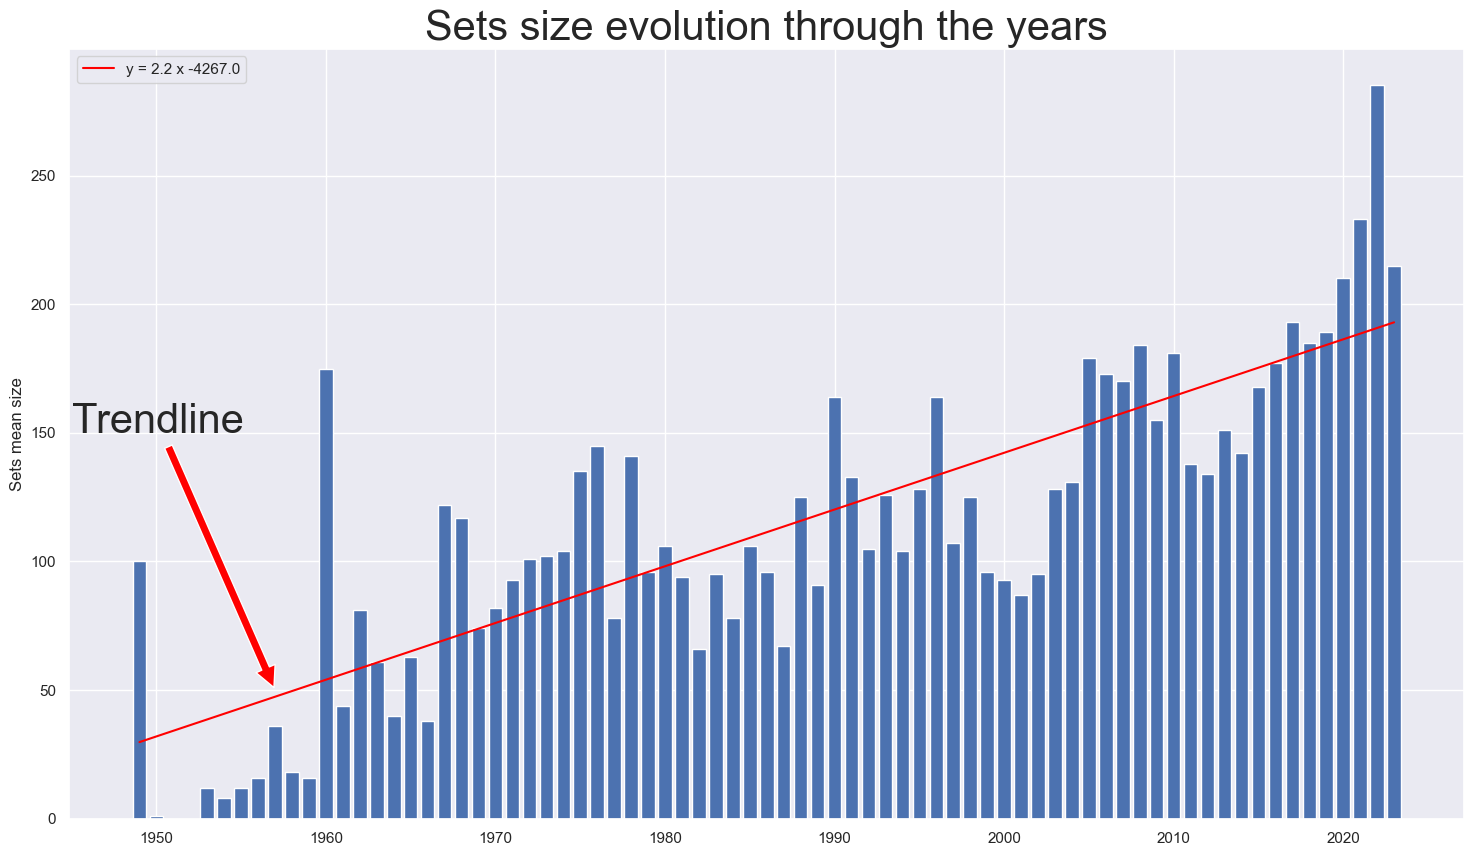

In [91]:
z = np.polyfit(year, sets_mean_size_year, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(18,10))
ax.bar(year, sets_mean_size_year)
ax.set_ylabel('Sets mean size')
ax.plot(year, p(year), c='red', label = f'y = {p.c.round(2)[0]} x {p.c.round(0)[1]}')
ax.set_title('Sets size evolution through the years',fontsize=30)
ax.annotate('Trendline',(1957,50), xytext=(1945,150), fontsize=30, arrowprops=dict(arrowstyle='simple', facecolor='red'))
ax.legend(loc='upper left')
plt.show()

## ¿Existe alguna asociación entre los colores y las temáticas?

In [92]:
#Change names of the columns 'id' and 'name' for 'theme_id' and 'theme_name' in the themes set
themes.rename(columns = {'id':'theme_id', 'name':'theme_name'}, inplace = True)
themes.head()

,theme_id,theme_name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [93]:
#Merge the datasets 'sets' with 'themes' by the column "theme_id" in the set 'sets_themes'
sets_themes = pd.merge(sets, themes, on="theme_id")
sets_themes

,set_num,name,year,theme_id,num_parts,img_url,theme_name,parent_id
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Technic,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,Technic,NaN
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,https://cdn.rebrickable.com/media/sets/1030-1.jpg,Technic,NaN
3,1038-1,ERBIE the Robo-Car,1985,1,120,https://cdn.rebrickable.com/media/sets/1038-1.jpg,Technic,NaN
4,1039-1,Manual Control Set 1,1986,1,39,https://cdn.rebrickable.com/media/sets/1039-1.jpg,Technic,NaN
...,...,...,...,...,...,...,...,...
21195,M20-2566-10,Modulex Box - 10x Window 1 x 6 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-256...,Modulex,NaN
21196,M20-2575-10,Modulex Box - 10x Window 1 x 7 x 5,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,Modulex,NaN
21197,M20-2576-10,Modulex Box - 10x Window 1 x 7 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,Modulex,NaN
21198,M20-2586-10,Modulex Box - 10x Window 1 x 8 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-258...,Modulex,NaN


In [94]:
#Delete the columns 'img_url' and 'parent_id' of the set 'sets_themes'
sets_themes = sets_themes.drop(columns=['img_url','parent_id'])
sets_themes

,set_num,name,year,theme_id,num_parts,theme_name
0,001-1,Gears,1965,1,43,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,Technic
3,1038-1,ERBIE the Robo-Car,1985,1,120,Technic
4,1039-1,Manual Control Set 1,1986,1,39,Technic
...,...,...,...,...,...,...
21195,M20-2566-10,Modulex Box - 10x Window 1 x 6 x 6,1963,716,10,Modulex
21196,M20-2575-10,Modulex Box - 10x Window 1 x 7 x 5,1963,716,10,Modulex
21197,M20-2576-10,Modulex Box - 10x Window 1 x 7 x 6,1963,716,10,Modulex
21198,M20-2586-10,Modulex Box - 10x Window 1 x 8 x 6,1963,716,10,Modulex


In [95]:
#Merge the datasets 'sets_themes' with 'inventories' by the column "set_num"
sets_themes_inv = pd.merge(inventories, sets_themes,  on="set_num")
sets_themes_inv

,id,version,set_num,name,year,theme_id,num_parts,theme_name
0,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
1,3,1,3931-1,Emma's Splash Pool,2012,494,43,Friends
2,4,1,6942-1,Zo Weevil,1999,134,20,Insectoids
3,15,1,5158-1,"T-Junction, Circle Plates",1990,443,2,Service Packs
4,16,1,903-1,Train Wheels and Couplers,1969,371,10,Supplemental
...,...,...,...,...,...,...,...,...
22807,176406,1,853806-1,Lion Knight Dress-Up,2018,737,0,Role Play Toys and Costumes
22808,176407,1,853803-1,Princess Dress-Up,2018,737,0,Role Play Toys and Costumes
22809,176408,1,853808-1,Dragon Shield,2018,737,0,Role Play Toys and Costumes
22810,176409,1,853809-1,Dragon Knight Dress-Up,2018,737,0,Role Play Toys and Costumes


In [96]:
#Change names of the columns 'inventory_id' for 'id' in the 'inventory_parts' set
inventory_parts.rename(columns = {'inventory_id':'id'}, inplace = True)
inventory_parts

,id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,NaN
4,1,upn0350,25,1,f,NaN
...,...,...,...,...,...,...
1125831,176539,2527,6,2,f,NaN
1125832,176539,3062b,0,12,f,NaN
1125833,176539,4600,0,4,f,NaN
1125834,176539,4624,7,8,f,NaN


In [97]:
#Merge the datasets 'inventory_parts' with 'sets_themes_inv' by the column "id"
result = pd.merge(inventory_parts, sets_themes_inv, on="id")
result

,id,part_num,color_id,quantity,is_spare,img_url,version,set_num,name,year,theme_id,num_parts,theme_name
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
2,1,stickerupn0077,9999,1,f,NaN,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
3,1,upn0342,0,1,f,NaN,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
4,1,upn0350,25,1,f,NaN,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064448,176539,2527,6,2,f,NaN,3,5134-1,Cannons and Wheels,1995,443,28,Service Packs
1064449,176539,3062b,0,12,f,NaN,3,5134-1,Cannons and Wheels,1995,443,28,Service Packs
1064450,176539,4600,0,4,f,NaN,3,5134-1,Cannons and Wheels,1995,443,28,Service Packs
1064451,176539,4624,7,8,f,NaN,3,5134-1,Cannons and Wheels,1995,443,28,Service Packs


In [98]:
#Delete the columns 'quantity', 'is_spare' and 'img_url' of the set 'result'
result = result.drop(columns=['quantity','is_spare','img_url'])
result

,id,part_num,color_id,version,set_num,name,year,theme_id,num_parts,theme_name
0,1,48379c01,72,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
1,1,48395,7,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
2,1,stickerupn0077,9999,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
3,1,upn0342,0,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
4,1,upn0350,25,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
...,...,...,...,...,...,...,...,...,...,...
1064448,176539,2527,6,3,5134-1,Cannons and Wheels,1995,443,28,Service Packs
1064449,176539,3062b,0,3,5134-1,Cannons and Wheels,1995,443,28,Service Packs
1064450,176539,4600,0,3,5134-1,Cannons and Wheels,1995,443,28,Service Packs
1064451,176539,4624,7,3,5134-1,Cannons and Wheels,1995,443,28,Service Packs


In [99]:
#create the data set 'Theme_color'
Theme_color = result[['color_id', 'theme_name']]

In [100]:
#group the 'Theme_color' dataset by the 'theme_name' and count the quantity of diferente colors of the parts
colors_themes = pd.DataFrame(Theme_color.groupby(by='theme_name').apply(lambda x: x['color_id'].value_counts()))
colors_themes

count
theme_name color_id       
12V        0           602
           7           346
           4           308
           15          119
           14          119
...                    ...
eLAB       2             5
           15            4
           288           3
           19            1
           47            1

[11022 rows x 1 columns]

In [101]:
#Create a dic with the keys:'theme name' and value:'most common color of the theme' 
first_color_theme={}
for i in Theme_color['theme_name'].unique():
    first_color_theme[i] = colors_themes.loc[i].iloc[0][0]
first_color_theme

{'Gravity Games': 59,
 'Friends': 10949,
 'Insectoids': 233,
 'Service Packs': 682,
 'Supplemental': 828,
 'Creator': 1782,
 'Bulk Bricks': 79,
 'Star Wars': 17740,
 'Disney Series 1': 18,
 'Town Jr.': 421,
 'Desert': 329,
 'Police': 2971,
 'Train': 249,
 'Classic Town': 5396,
 'The LEGO Batman Movie Series 1': 25,
 'Universal Building Set': 667,
 'Bionicle': 2901,
 'Educational and Dacta': 1235,
 'Magnets': 61,
 'Easter': 310,
 'Classic Basic': 652,
 'Harry Potter': 3466,
 'Ultimate Collector Series': 3454,
 'World City': 642,
 'Batman': 3167,
 'Blacktron II': 700,
 'Dino Island': 153,
 'Arctic': 484,
 'Exo-Force': 1199,
 'Clocks and Watches': 251,
 'The LEGO Movie': 813,
 'Creator 3-in-1': 4411,
 'Creator Expert': 2740,
 'Belville': 990,
 'Racers': 3204,
 'Designer Sets': 702,
 'Basic': 1873,
 'Space Port': 230,
 'Cars': 751,
 'Bricktober': 295,
 'Dimensions': 627,
 'Series 3 Minifigures': 20,
 'Series 12 Minifigures': 18,
 'Airport': 1005,
 'Technic': 14521,
 'Mission Deep Freeze': 

In [102]:
first_color_theme_df = pd.DataFrame([first_color_theme.values(), first_color_theme.keys()], index=['color', 'theme']).T
first_color_theme_df 

,color,theme
0,59,Gravity Games
1,10949,Friends
2,233,Insectoids
3,682,Service Packs
4,828,Supplemental
...,...,...
366,18,The Muppets
367,287,Avatar
368,12,Series 23 Minifigures
369,14,Series 24 Minifigures


In [103]:
# Agregar un numeral a los rgb
colors['rgb'] = colors['rgb'].apply(lambda x : '#'+x)
colors_set = dict(zip(colors.name, colors.rgb))
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],#0033B2,f
1,0,Black,#05131D,f
2,1,Blue,#0055BF,f
3,2,Green,#237841,f
4,3,Dark Turquoise,#008F9B,f


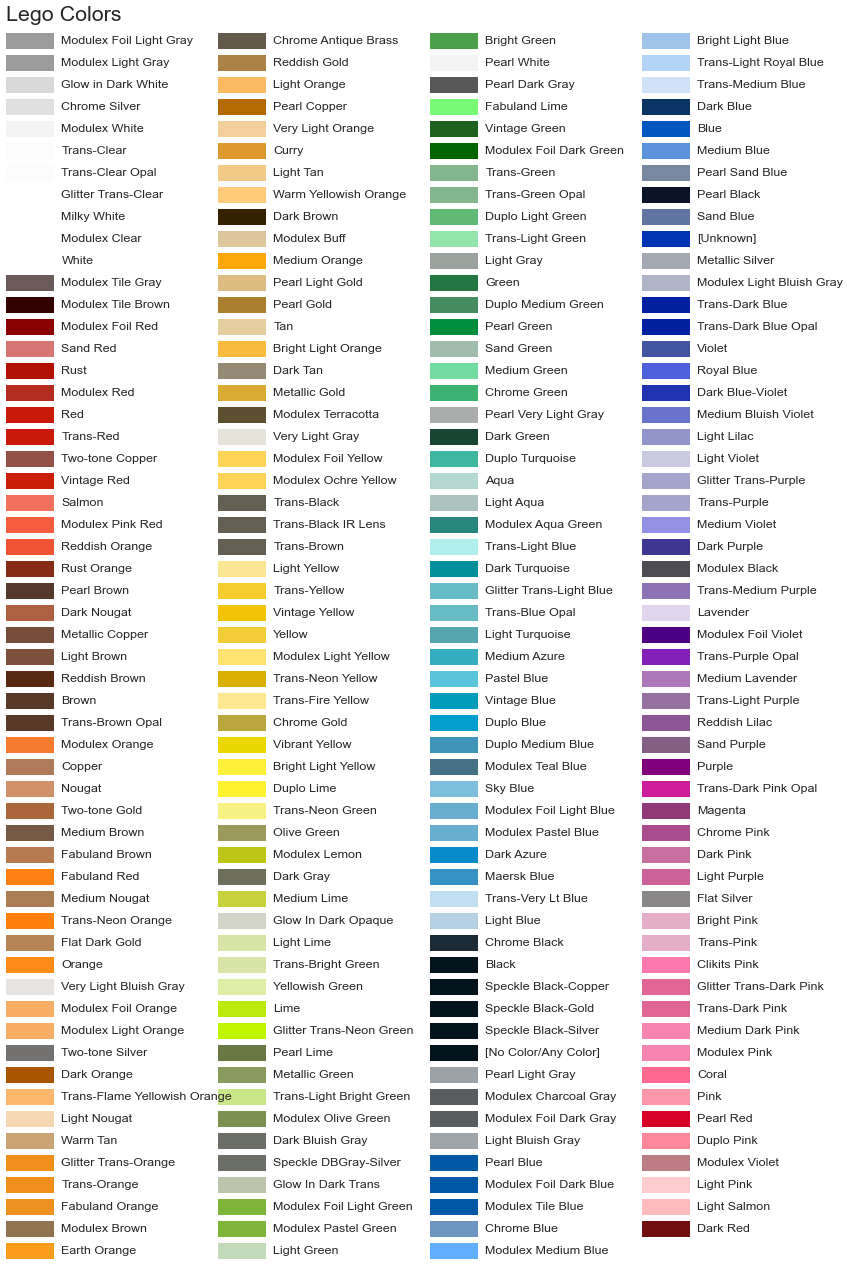

In [104]:
# Visualizar todos los colores en el dataset
import matplotlib.colors as mcolors

def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 64

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

plot_colortable(colors_set, "Lego Colors")
plt.show()

In [105]:
# Agregar rgb en theme_color
colors.rename(columns={'id': 'color_id'}, inplace=True)
color_rgb = pd.merge(Theme_color, colors, on='color_id')
color_rgb

,color_id,theme_name,name,rgb,is_trans
0,72,Gravity Games,Dark Bluish Gray,#6C6E68,f
1,72,Star Wars,Dark Bluish Gray,#6C6E68,f
2,72,Star Wars,Dark Bluish Gray,#6C6E68,f
3,72,Star Wars,Dark Bluish Gray,#6C6E68,f
4,72,Star Wars,Dark Bluish Gray,#6C6E68,f
...,...,...,...,...,...
1064448,1089,LEGO Ideas and CUUSOO,Warm Tan,#CCA373,f
1064449,1089,LEGO Ideas and CUUSOO,Warm Tan,#CCA373,f
1064450,1089,LEGO Ideas and CUUSOO,Warm Tan,#CCA373,f
1064451,1089,LEGO Ideas and CUUSOO,Warm Tan,#CCA373,f


In [292]:
# Si se quisieran filtrar solo algunos themes usar el codigo comentado (se uso para correr mas rapido probando distintos graficos)
#themes_of_interest = ['Gravity Games', 'LEGO Ideas and CUUSOO', 'Star Wars', 'Friends']  
#filtered_data = color_rgb[color_rgb['theme_name'].isin(themes_of_interest)]

# Agrupar RGB por tema
#grouped_theme = filtered_data.groupby('theme_name')

# Agrupar RGB por tema
grouped_theme = color_rgb.groupby('theme_name')

# Count the frequency of each RGB code within each theme
theme_color_counts = grouped_theme['rgb'].value_counts()

# Select the top 10 colors for each theme
top_10_colors = theme_color_counts.groupby(level=0).nlargest(10)

top_10_colors_df = top_10_colors.reset_index(level=0, drop=True).reset_index(name='frequency')


In [293]:
top_10_colors_df
unique_values = top_10_colors_df['theme_name'].nunique()
print("Cantidad de temas:", unique_values)

Cantidad de temas: 371


In [294]:
# Vamos a visualizar los 30 temas con mas piezas
grouped_df = top_10_colors_df.groupby('theme_name').agg({'frequency': 'sum'})
#grouped_df
sorted_df = grouped_df.sort_values('frequency', ascending=False)
#sorted_df
filtered_df = sorted_df.head(30)
filtered_df = filtered_df.reset_index()
theme_list = filtered_df['theme_name'].tolist()
theme_list

['Star Wars',
 'Technic',
 'Friends',
 'Ninjago',
 'Classic Town',
 'Creator 3-in-1',
 'Harry Potter',
 'City',
 'Police',
 'Ultimate Collector Series',
 'LEGO Ideas and CUUSOO',
 'Creator Expert',
 'Icons',
 'Basic Set',
 'Creator',
 'Town',
 'Monkie Kid',
 'Racers',
 'Modular Buildings',
 'Fire',
 'Brickheadz',
 'Bionicle',
 'Batman',
 'Duplo and Explore',
 'Speed Champions',
 'Minecraft',
 'Super Mario',
 'BrickLink Designer Program',
 'Construction',
 'Legends of Chima']

In [295]:
# Si se quisieran filtrar solo algunos themes usar el codigo comentado (se uso para correr mas rapido probando distintos graficos)
filtered_data = color_rgb[color_rgb['theme_name'].isin(theme_list)]

# Agrupar RGB por tema
grouped_theme = filtered_data.groupby('theme_name')

# Count the frequency of each RGB code within each theme
theme_color_counts = grouped_theme['rgb'].value_counts()

# Select the top 10 colors for each theme
top_10_colors = theme_color_counts.groupby(level=0).nlargest(10)

top_10_colors_df = top_10_colors.reset_index(level=0, drop=True).reset_index(name='frequency')

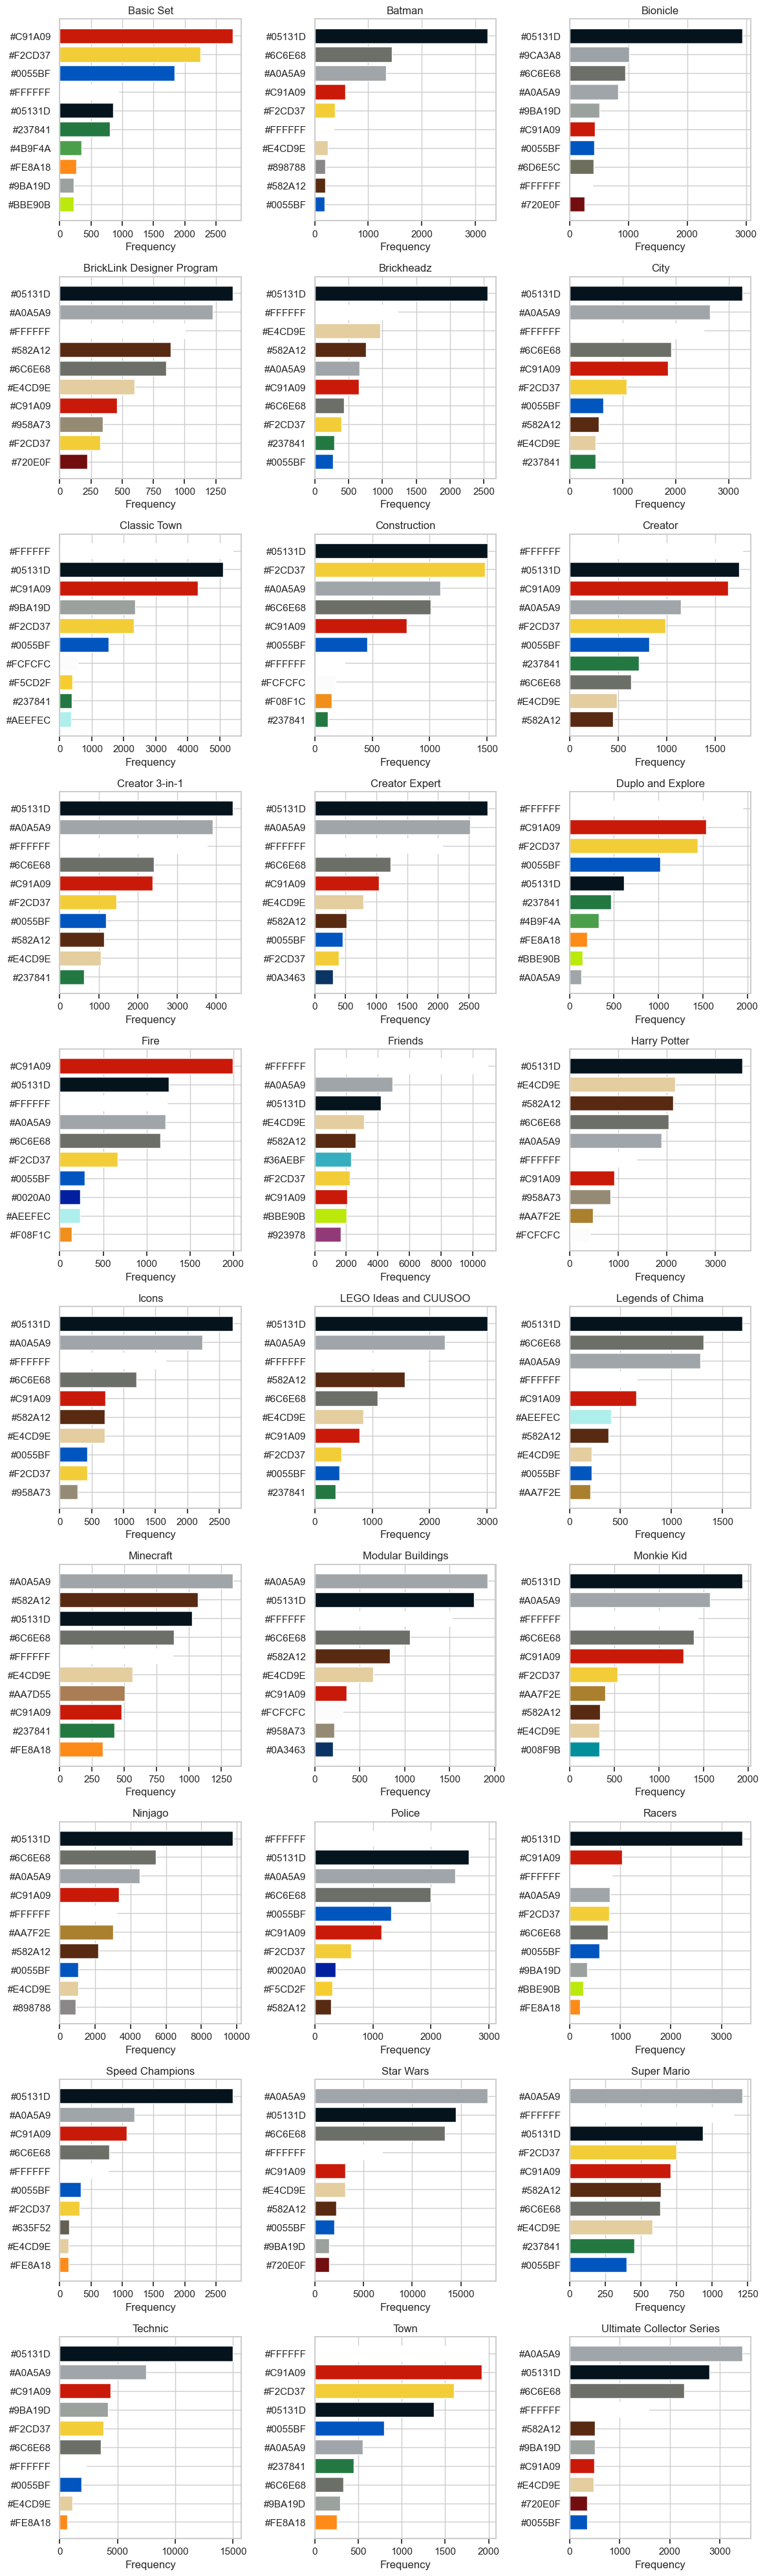

In [296]:
# Group the data by theme_name
grouped_data = top_10_colors_df.groupby('theme_name')

# Extract theme names and unique RGB codes
theme_names = list(grouped_data.groups.keys())

# Calculate the top 10 RGB codes for each theme
top_10_rgb_codes = {}
for theme_name, group in grouped_data:
    sorted_data = group.sort_values(by='frequency', ascending=False)
    top_10_data = sorted_data.head(10)
    top_10_rgb_codes[theme_name] = top_10_data['rgb'].tolist()

# Plotting the horizontal bar charts
num_charts = len(theme_names)
num_cols = 3
num_rows = (num_charts + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=False)

for i, theme_name in enumerate(theme_names):
    row = i // num_cols
    col = i % num_cols

    theme_rgb_codes = top_10_rgb_codes[theme_name]
    group = grouped_data.get_group(theme_name)
    frequencies = group.loc[group['rgb'].isin(theme_rgb_codes), 'frequency']
    colors = group.loc[group['rgb'].isin(theme_rgb_codes), 'rgb']

    y_pos = np.arange(len(frequencies))
    axs[row, col].barh(y_pos, frequencies, align='center', color=colors)
    axs[row, col].set_yticks(y_pos)
    axs[row, col].set_yticklabels(colors)
    axs[row, col].invert_yaxis()
    axs[row, col].set_xlabel('Frequency')
    axs[row, col].set_title(theme_name)

    # Create a twin Axes object for separate x-axis scale
    axs_twin = axs[row, col].twiny()

    # Adjust x-axis limits
    max_frequency = max(frequencies)
    axs_twin.set_xlim([0, max_frequency * 1.1])  # Add a buffer of 10% to the maximum frequency for better visibility

    # Remove ticks and labels from the twin Axes
    axs_twin.set_xticks([])
    axs_twin.set_xticklabels([])

# Hide unused subplots
if num_charts < num_rows * num_cols:
    for i in range(num_charts, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axs[row, col].axis('off')

plt.tight_layout()
plt.show()